
___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

<a id="top"></a>
________
# Clustering
____

## Contents
* <a href="#Imports">Dependency and Data Imports</a>
* <a href="#DataPrep">Data Preparation</a>
* <a href="#BusinessUnderstanding">Business Understanding</a>
* <a href="#DataUnderstanding1">Data Understanding 1</a>
* <a href="#DataUnderstanding2">Data Understanding 2</a> 
* <a href="#ModelEval1">Modeling and Evaluation 1</a>
* <a href="#ModelEval2">Modeling and Evaluation 2</a>
* <a href="#ModelEval3">Modeling and Evaluation 3</a>
* <a href="#ModelEval4">Modeling and Evaluation 4</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
_______

___
___
<a href="#top">Back to Top</a>
<a id="Imports"></a>
## Imports

In [1]:
# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

# for option A: Clustering methods
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# for option B: association rule mining
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# for option C:
# import graphlab as gl

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
# import skfuzzy as fuzz ## Not finding the package
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS


In [2]:
# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


___
___
<a href="#top">Back to Top</a>
<a id="DataPrep"></a>
## Data Preperation
To Do:

    Remove Outliers
    Scale Data
    Remove non-independent variables

In [3]:
# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not as useful

# Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['news_category'], drop_first=False)

# Factor the `day_of_week` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()
print(df1.isnull().sum())

timedelta                0
n_tokens_title           0
n_unique_tokens          0
average_token_length     0
num_keywords             0
                        ..
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Length: 61, dtype: int64


In [4]:
# df1.columns 
# df1 = df1[['shares', 'title_sentiment_polarity']]

In [5]:
# Scale the features in the training and testing sets using standard scalar.
scaler = StandardScaler()

df1_std = scaler.fit_transform(df1)
# print(df1_std)

___

___
___
<a href="#top">Back to Top</a>
<a id="BusinessUnderstanding"></a>
## Business Understanding 1 (10 points).
Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). 

    This data was collected by Mashable.com a digital media company that publishes articles on variety of subjects from technology to world news. They provide coverage on the latest trends and developments as well as entertaining articles covering lifestyle and pop culture. The data was collected by Mashable in ___ to better understand their readers preferences in the hopes of altering or adjusting their content to create more popular content. The more popular (shares) an article had the more ad revenue and web traffic is generated for Mashable. 
----
    
How will you measure the effectiveness of a good algorithm? 

    A good algorthm will create valuable insight into what drives a popular article as well as web traffic to Mashable.com. The greater the number of shares and web traffic the more ad revenue can be generated for Mashable. By creatinga  good algorithm Mashable will be able to adjust their content to better suit their readers preferences and 

----

Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

    Our chosen validation method makes sense for this dataset and the stakeholders involved ... 


____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding1"></a>
## Data Understanding 1 (10 points total)


Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 

    ##### pull this from previous lab 
----

Verify data quality: 

Are there missing values?

    The dataset does not have any missing values. 
----

Duplicate data?

        Only two features were providing duplicate data and were dropped.

        log_shares which is a duplicate of the feature shares just in a different form.
        
        log_shares was dropped since it was not useful to the model and the data was 
        already captured with the feature shares. 

----

Outliers? 

----

Are those mistakes? 
    There were no mistakes in the dataset, however there were some features that were deemed useless to the model; url_name and date. 

----

How do you deal with these problems? 
    We dealt with these issues by using our domain knowledge and understanding of the dataset to eliminate features that were either duplicates of another feature or provided no predictive value to our model.
    
----

____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding2"></a>
## Data Understanding 2 (10 points total)


    [10 points]
        Visualize the any important attributes appropriately.
        Important: Provide an interpretation for any charts or graphs.

___
___
<a href="#top">Back to Top</a>
<a id="ModelEval1"></a>
## Modeling and Evaluation 1 (10 points total)
Train and adjust parameters

----

### KMeans++

Cluster memberships:
[2 2 2 ... 1 1 1]


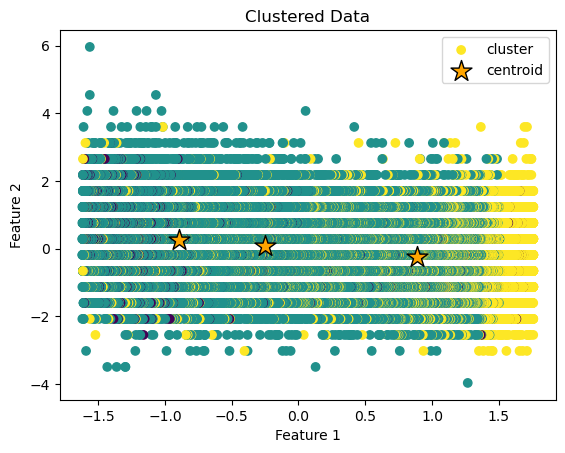

In [6]:
# init used to initialize the cluster centroids - default is random but here we are choosing kmeans++ because it leads to faster convergence, n_init is the number of times to run the KMeans algo with different initializations - the default is 10 
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster","centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
Kplt1 = plt.show()
Kplt1

    The kmeans.cluster_centers in the code finds the centroids (average) of similar points with continuous features marked with stars.

    Too choose the best k we ran the k-means algorithm multiple times on the dataset until we judged 3 to be the optimal number of clusters. 



    Below we delve into the elbow method to determine if our chosen k is the definitive answer. To properly judge the performance and quality of the clustering we need to use the within-cluster SSE aka distortion to compare the clustering. 

Distortion: 2106016.87


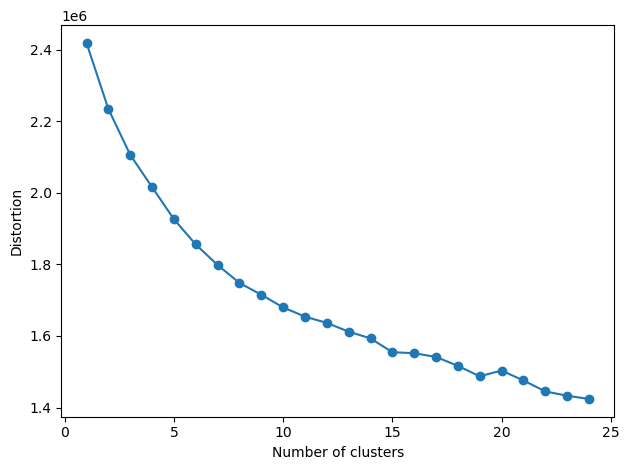

In [7]:
print('Distortion: %.2f' % kmeans.inertia_)
distortions = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    kmeans.fit(df1_std)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
Kplte = plt.show()
Kplte

    The plot's elbow is somewhere between 5-10 clusters. Our best guess is 7. So below we run the clustering again with 7 clusters. 

Cluster memberships:
[4 4 4 ... 0 5 1]


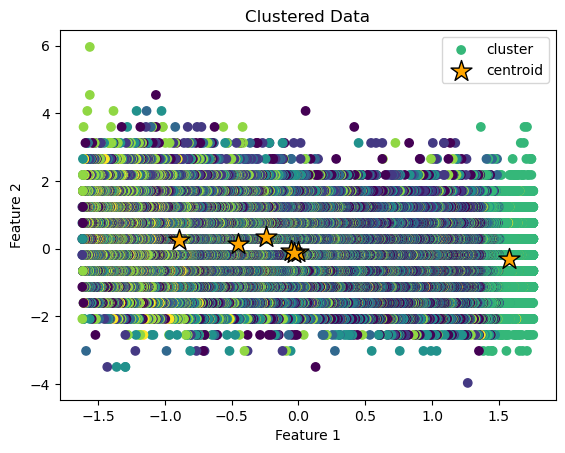

In [8]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10).fit(df1_std)

print("Cluster memberships:\n{}".format(kmeans.labels_))

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=250, marker='*',c='orange', edgecolor='black', label='Centroids')
plt.legend(["cluster", "centroid"], loc='best')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
Kplt2 = plt.show()
Kplt2

    The centroids are are illustrated by stars and clusters indicated by different colored circles.

----

### Agglomorative Clustering

    Agglomerative Clustering Refers to a collection of clustering algo that all build upon the same principles: the algo starts by declaring each point in its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied ( it has no predict method use fit_predict instead)-- quote from book 

Dendrograms

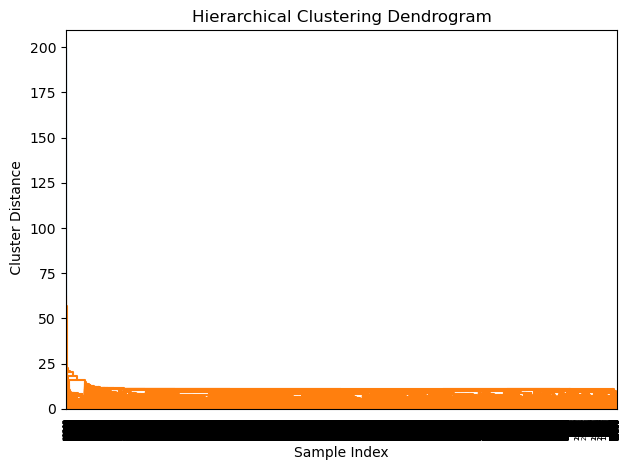

In [9]:
# average linkage 
# merges the two clusters that have the smallest average distance between all their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='average')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltA = plt.show()
ACDpltA

    This dendogram utilized the "average" linkage method which picks two clusters to merge that are the smallest distance between all other points.

    The resulting dendogram is nearly unintelligible given the sample index and the number of cluster distances at 25. This method is not optimal. 


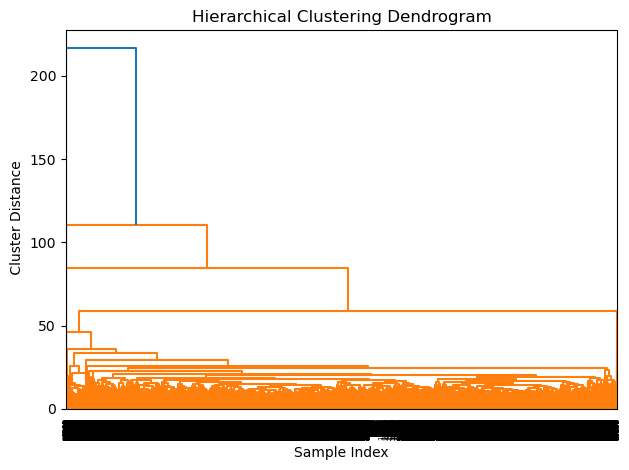

In [10]:
# complete linkage (also known as maximum linkage)
# merges the two clusters that have the smallest maximum distance between their points.

# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='complete')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltC= plt.show()
ACDpltC

    This dendogram utilized the "complete" linkage, also known as the "maximum linkage" method, picks two clusters to merge that are the smallest maximum distance between their points.

    The resulting dendogram shows some clear potential cluster cutoff lines that could be chosen. 




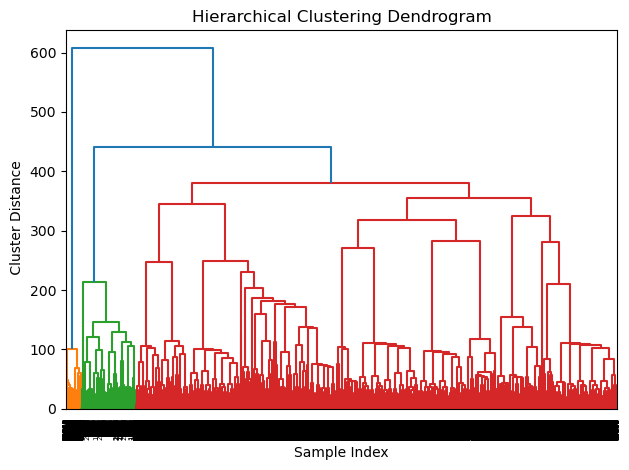

In [11]:
# Compute the linkage matrix
linkage_matrix = linkage(df1_std, method='ward')

# Dendrogram the linkage matrix
dendrogram(linkage_matrix)
ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')
plt.tight_layout()
ACDpltW= plt.show()
ACDpltW

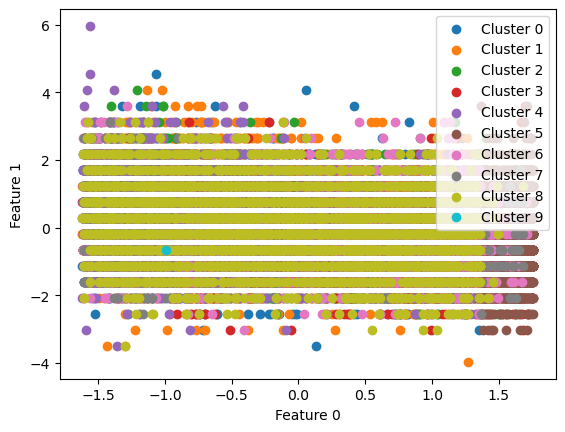

In [12]:
# ward linkage

model = AgglomerativeClustering(linkage='ward', n_clusters=10)

# Agglomerative clustering has no predict method, to build a model and get clustering memberships on the training set, we have to use the fit_predict method 
assignment = model.fit_predict(df1_std)

# Plot, but not ideal for feature set greater than 2, a dendogram like we have below would be more appropriate to visualize. 
unique_labels = np.unique(assignment)
for label in unique_labels:
    plt.scatter(df1_std[assignment == label, 0], df1_std[assignment == label, 1], label=f'Cluster {label}')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()
ACpltW = plt.show()
ACpltW


    Linkage choice is ward - the default -- ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. 

    Other linkage options to use if ward doesnt work even thought it should work on most datasets, if the clusters have very dissimilar numbers of members meaning one is much bigger than the others then we can try these options - average: merges the two clusters that have the smallest avg distance between all their points, complete: aka maximum linkage merges the two clusters that have the smallest maximum distance between points 

----
### DBSCAN

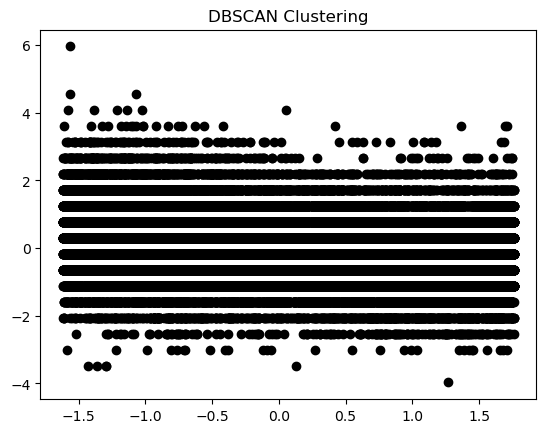

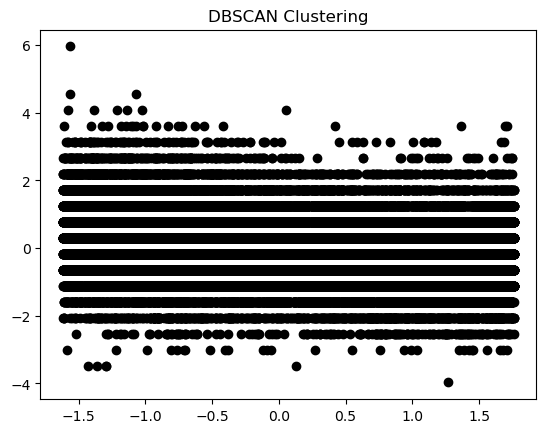

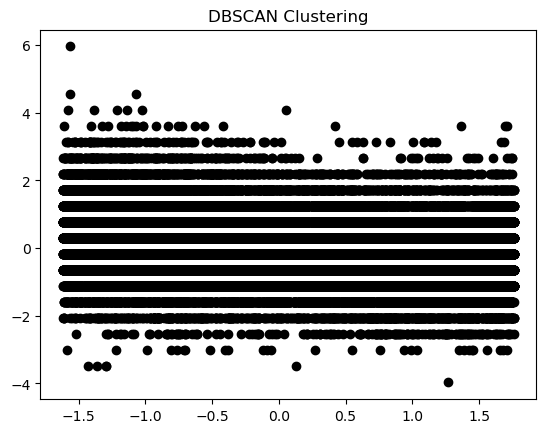

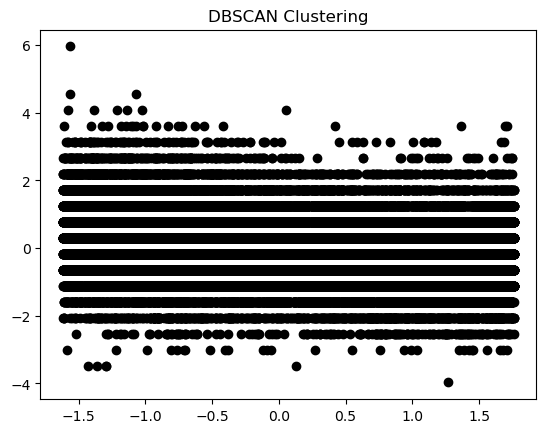

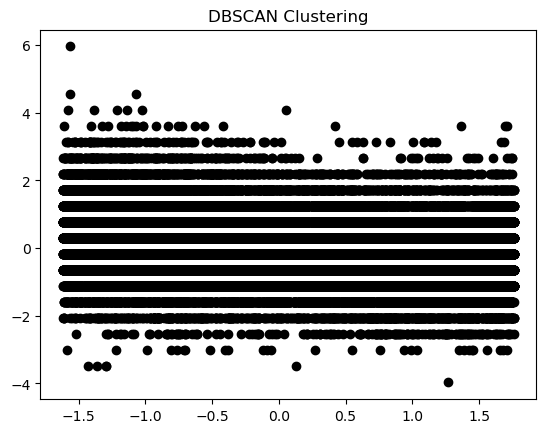

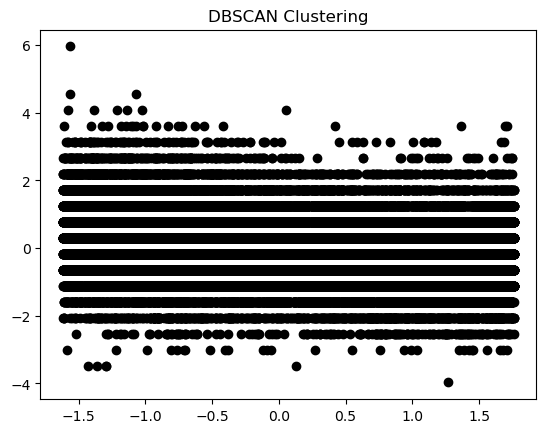

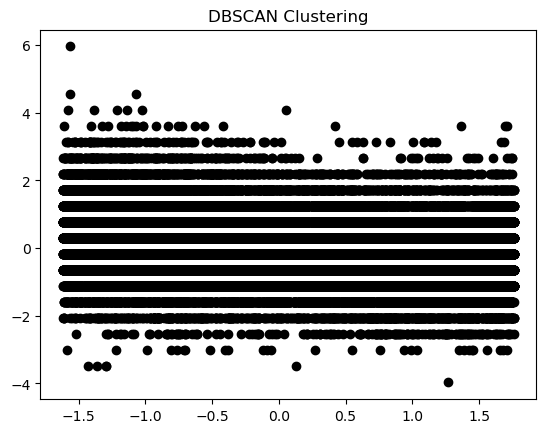

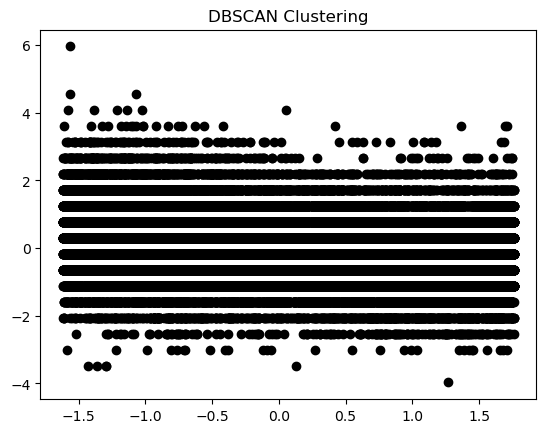

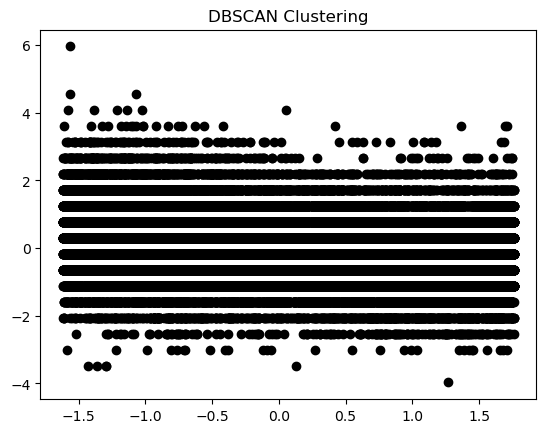

In [13]:
# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        
        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

----

### Fuzzy C-Means Clustering

    Fuzzy C-Means Clustering - another type of unsupervised learning alogorithm that is also known as soft-Kmeans clustering. The name alludes to the way the alogrithm allows a point to have a varying degree of membership in each cluster. This method balances the distance between the a given point and the centroid of the cluster and the degree of each membership of each point in each cluster.

In [14]:
# # Fuzzy C-Means Clustering - visualize, score it (there are other scoring methods too)
# # ! pip install scikit-fuzzy

# # Number of clusters
# n_clusters = 7

# # Fuzzy c-means algorithm
# cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df1_std.T, n_clusters, 2, error=0.005, maxiter=1000)

# # Assign each data point to the cluster with the highest membership value
# cluster_membership = np.argmax(u, axis=0)

# # Plotting the results
# fig, ax = plt.subplots()
# for j in range(n_clusters):
#     ax.scatter(df1_std[cluster_membership == j, 0], df1_std[cluster_membership == j, 1], label=f'Cluster {j + 1}', marker='o')

# ax.legend()
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Fuzzy C-Means Clustering')
# plt.show()
# plt.show()

# # citing source https://medium.com/@avinashkella/understanding-fuzzy-c-means-clustering-with-python-implementation-a-beginners-guide-3dbdf180393b

----

### Gaussian Mixture Model

    GMM - A Gaussian Mixture Model is a another method that will try to find a mix of multi-dimensional Gaussian probability distributions that best model any feature in the dataset. 

    cite source: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    cite source: https://www.datatechnotes.com/2022/07/clustering-example-with-gaussian.html

In [15]:
# Gaussian Mixture Models (GMM) - visualize, score it (there are other scoring methods too)
gmm = GaussianMixture(n_components=7).fit(df1_std)

gmm.get_params() 

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 7,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

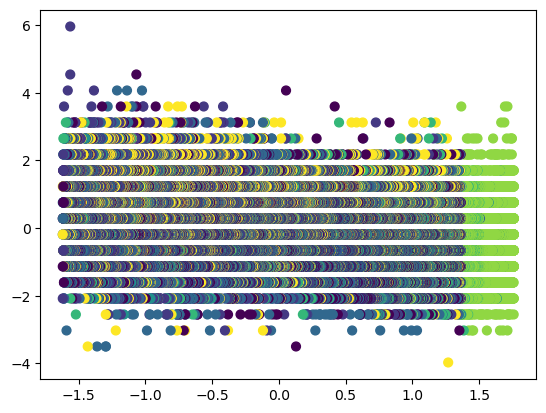

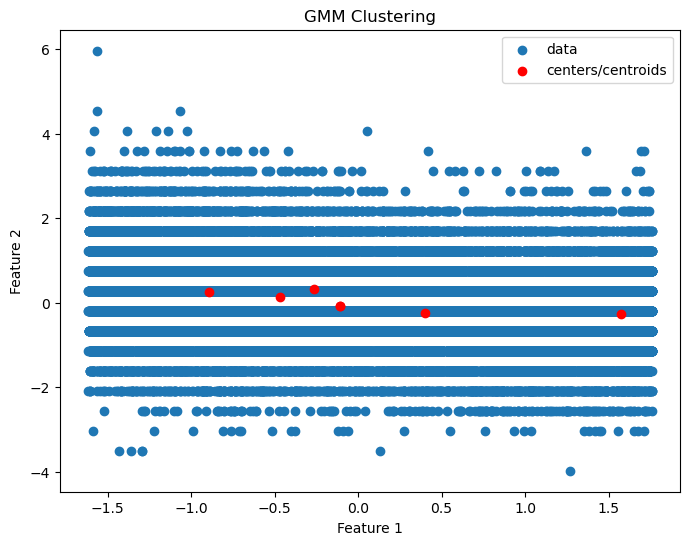

In [16]:
labels = gmm.predict(df1_std)
plt.scatter(df1_std[:, 0], df1_std[:, 1], c=labels, s=40, cmap='viridis');

probs = gmm.predict_proba(df1_std)
# print(probs[:5].round(3))

# obtain the center of each cluster
centers = gmm.means_
# print(centers)

# take centers and visualize them 
plt.figure(figsize=(8, 6))
plt.scatter(df1_std[:,0], df1_std[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers/centroids")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("GMM Clustering")
GMMplt= plt.show()
GMMplt

    {This may need to be changed}
    We are using a GMM model with 7 clusters as per our elbow method for the best guess. 

    Centroids or centers for the 7 clusters (n_components) in the GMM model is shown in red dots with the data points in blue. 

----

### OPTIC Clustering

    OPTIC Clustering -- Ordering Points To Identify Clustering Structure a density based unsupervised learning algorithm similar to DBSCAN. OPTICS unlike DBSCAN deos not require the density to be consistent across a dataset, so for OPTICS we can discard eps (constant distance parameter).

    site Source: https://towardsdatascience.com/understanding-optics-and-implementation-with-python-143572abdfb6
    site Source: https://cdanielaam.medium.com/understanding-optics-clustering-hands-on-with-scikit-learn-1786bddc71f5
    site Source:  https://www.geeksforgeeks.org/ml-optics-clustering-explanation/
    

In [17]:
# 23
# 
# Add another OPTICS (Ordering Points To Identify Clustering Structure): Method Spectral Clustering:- visualize, score it (there are other scoring methods too)

# Fit the OPTICS model
clustering = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
clustering.fit(df1_std)

# Extract the clusters
labels = clustering.labels_

# Print the cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [-1 -1 -1 ...  0  0  0]


___
___
<a href="#top">Back to Top</a>
<a id="ModelEval2"></a>
## Modeling and Evaluation 2 (10 points total)
Evaluate and Compare

----

### KMeans++


    Another evaluation method to judge the performance and quality of clustering is the silhouette analysis. We can plot the analysis to judge how tight the items are grouped together in clusters. 

    In order to do silhouttee analysis we have to use fit_predict a combination of both fitting of the model and prediction of cluster labels in a single step, which allows us to calculate the silhouette scores directly. 

In [18]:
# Silhouette Analysis 

kmeans = KMeans(init='k-means++',n_clusters=7, n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = kmeans.fit_predict(df1_std)

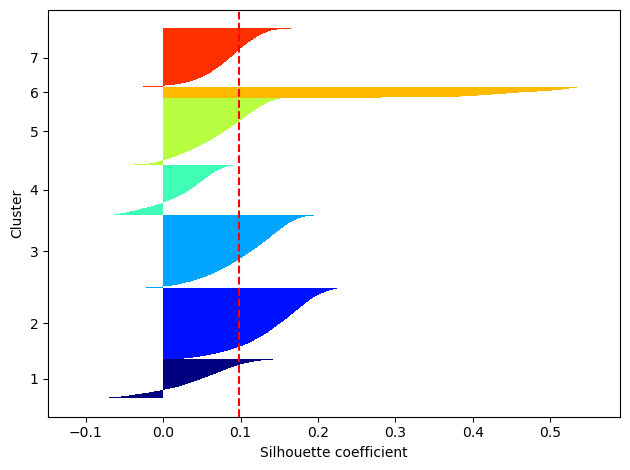

Silhouette Coefficient: 0.098


In [19]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SKplt = plt.show()
SKplt

labels = kmeans.labels_

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))

    The average silhouette coefficient is indicated by the red dotted line. The red clustering (Cluster 7) performed best (above average) which indicates it is relatively well-separated and cohesive thus the data points more similar to each other than they are to data points in neighboring clusters. The resulting plot shows that overall the silhouettes are visibly different lengths and widths which is indicative of sub-optimal clustering. We also have clusters that go below zero indicating that these clusters were on a decision boundary and struggled to cluster the points. 

    Ideally we would want the silhouette coefficient should be closer to 1 to indicate better quality of clustering. 

----
### Agglomorative Clustering

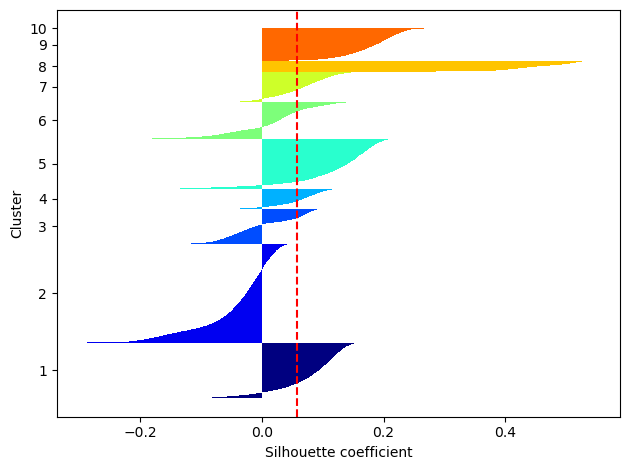

Silhouette Coefficient: 0.057


In [20]:
# SCORE THE AGGLOMORATIVE METHOD 
model = AgglomerativeClustering(linkage='ward', n_clusters=10)

# Agglomerative clustering has no predict method, to build a model and get clustering memberships on the training set, we have to use the fit_predict method 
y_km = model.fit_predict(df1_std)
# Get the cluster assignments
labels = model.labels_

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.tight_layout()
SACplt = plt.show()
SACplt

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))

    The silhouettes have visibly different lengths and widths which is evidence of suboptimal clustering. The red-dotted line illustrates the average silhouette coefficient with some clusters performing below the average. Some clusters also struggled to properly cluster points as they are near decision boundaries. 

    For a good cluster we would like to see a silhouette coefficient closer to one, our highest in the plot was around 0.5. 

----
### OPTIC Clustering

c:\Users\bfo2f\.conda\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\bfo2f\.conda\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


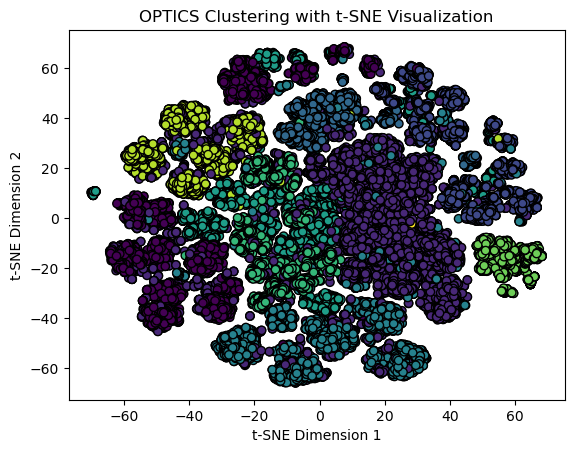

In [21]:
# Evaluate Optics
# Experiment to get a better visual by doing dimensioanlity redction to plot only 
# the two most important feature to maybe make our clustering look prettier

# an attempt to do dimensionality reduction idk if this the correct way to apply 
# Apply t-SNE for dimensionality reduction to 2D

tsne = TSNE(n_components=2, random_state=42)
df1_std_tsne = tsne.fit_transform(df1_std)

# Visualize the clusters in 2D
plt.scatter(df1_std_tsne[:, 0], df1_std_tsne[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('OPTICS Clustering with t-SNE Visualization')
OCplt = plt.show()
OCplt

    {Working}  Evaluate -- two clear clusters reduced to by tSNE - again im not sure this a proper approach ?? to make our clustering look better -- we need to visualize but this is 2D and by applying tsne we reduce our 60plus features down to the two most important then visualize the cluster was the thought process. 

In [22]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df1_std, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.0574600527512066


___
___
<a href="#top">Back to Top</a>
<a id="ModelEval3"></a>
## Modeling and Evaluation 3 (10 points total)
Visualize Results

----

### KMeans++

In [23]:
# previously saved graph
Kplt1

    The plot's elbow is somewhere between 5-10 clusters. Our best guess is 7. So below we run the clustering again with 7 clusters. 

In [24]:
# previously saved graph
Kplte

    The centroids are are illustrated by stars and clusters indicated by different colored circles.

#### Silhouette method for evaluation

In [25]:
# previously saved graph
SKplt

----
### Hierarchical Clustering

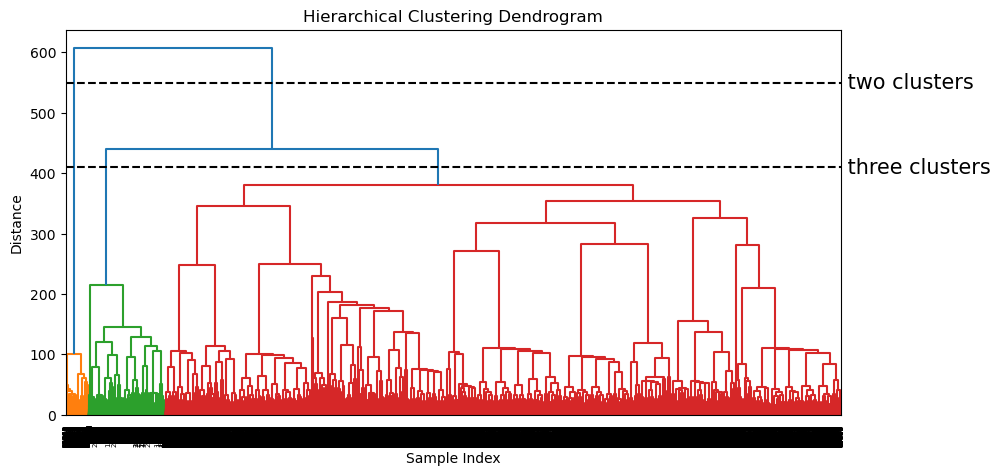

In [26]:
# Dendogram

# Perform hierarchical clustering
linkage_matrix = linkage(df1_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)

# list clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [550, 550], '--', c='k')
ax.plot(bounds, [410, 410], '--', c='k')
ax.text(bounds[1], 550, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 410, ' three clusters', va='center', fontdict={'size': 15})

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##### More lines needed??

    Hierarchical cluster assignment (shown as lines) generated with agglomerative clustering, with numbered data point. Here we are looking at all possible clusters jointly, the above visual shows an overlay of all the possible clustering providing insight into how each cluster breaks up into smaller clusters. This visual however only works when we have two features (relies on two dimensional nature of the data), when we have more than two features we must use a dendrogram that can handle multidimensional datasets.

    Dendogram of the clustering shown above with lines indicating splits into two and three clusters. The y-axis specifies when the agglomerative algorithm two clusters are merged and the length of each branch shows how far apart the merged clusters are. 

----

### Agglomerative Clustering

Dendrograms

In [27]:
# Agglomerative Clustering using 'average' method
ACDpltA

In [28]:
# Agglomerative Clustering using 'complete' method
ACDpltC

    Using agglometerative clustering the algorithm has chosen 9 clusters. The hierarchal clustering method iteratively proceeded through every point and selected   2 more clusters than our previous elbow method. The dendrogram is a more appropriate visual for this dataset (more than two features). 

In [29]:
# Agglomerative Clustering using 'ward' method
ACDpltW

    This dendogram utilized the "ward" linkage method (default method) picks two clusters to merge such that the variance increases the least, this creates clusters that usually more evenly sized. 

    # not sure i need to site as this is not word for word from the book but just in case I am noting it here. 
    # Refer to Introduction of Machine Learning Chapter 3: Unsupurvised Learning and Processing p.182

need to add more cluster lines???

Clustering

In [30]:
# Agglomerative Clustering using 'ward' method
ACpltW


    Linkage choice is ward - the default -- ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. 

    Other linkage options to use if ward doesnt work even thought it should work on most datasets, if the clusters have very dissimilar numbers of members meaning one is much bigger than the others then we can try these options - average: merges the two clusters that have the smallest avg distance between all their points, complete: aka maximum linkage merges the two clusters that have the smallest maximum distance between points 

#### Silhouette method for evaluation

In [31]:
# previously saved graph using 'ward' method
SACplt

----
### DBSCAN

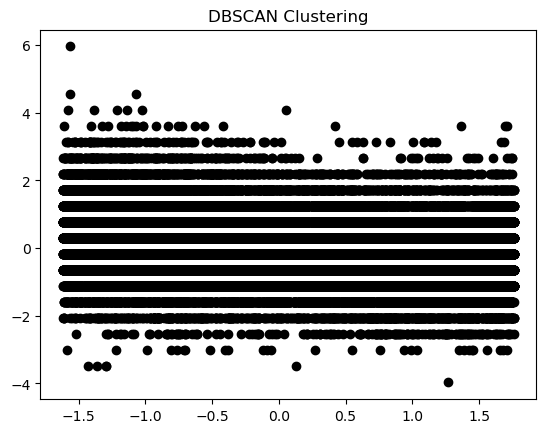

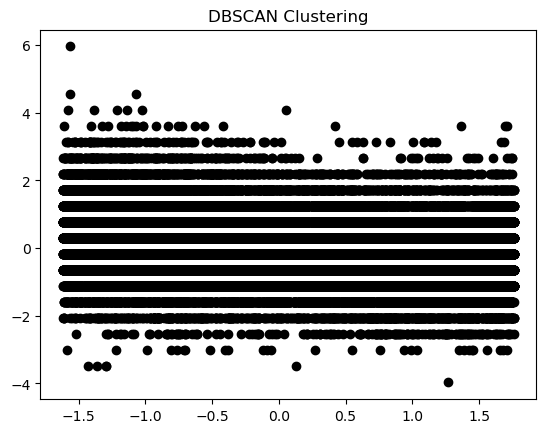

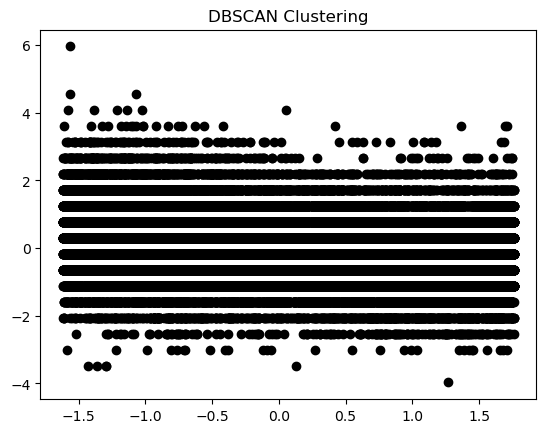

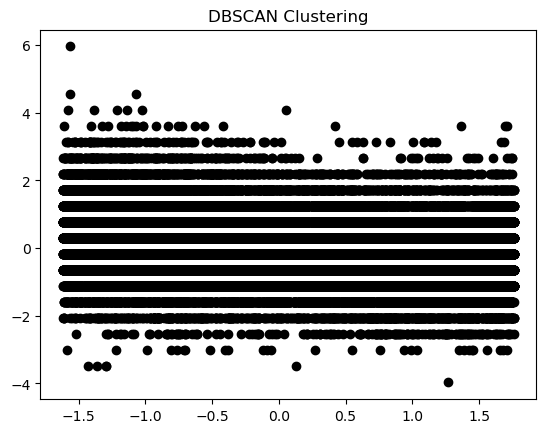

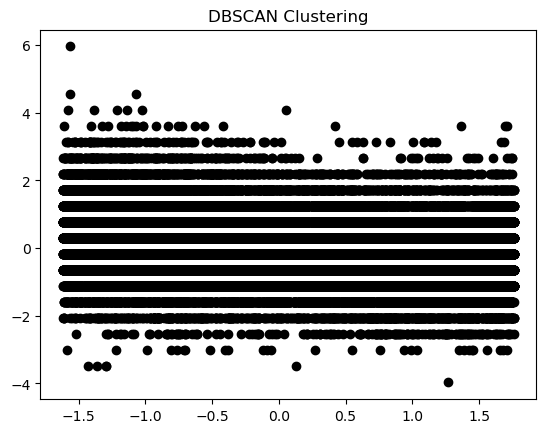

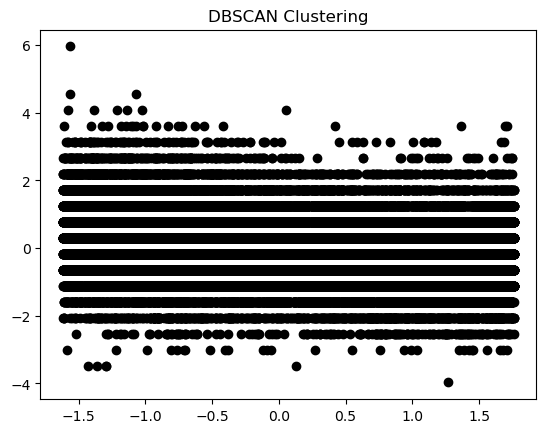

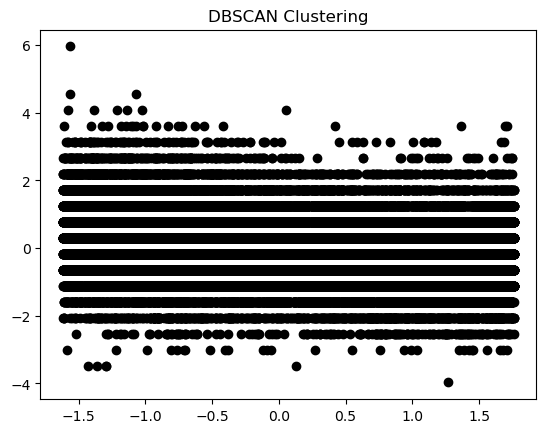

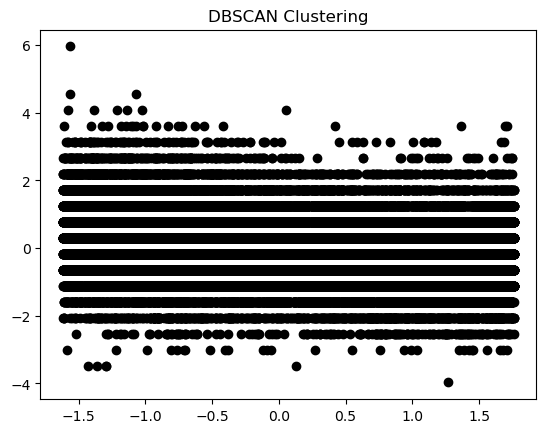

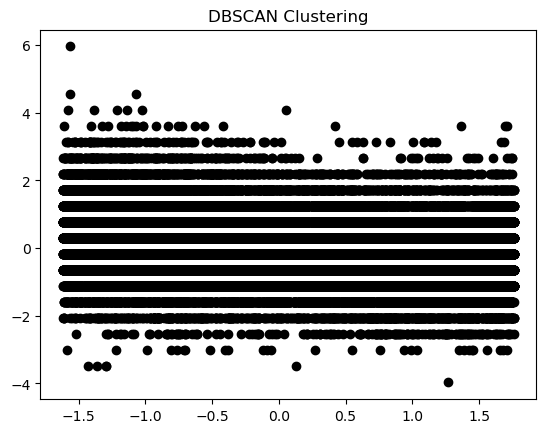

In [32]:
# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        
        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

----
### Fuzzy C-Means Clustering

In [33]:
# # Plotting the results
# fig, ax = plt.subplots()
# for j in range(n_clusters):
#     ax.scatter(df1_std[cluster_membership == j, 0], df1_std[cluster_membership == j, 1], label=f'Cluster {j + 1}', marker='o')

# ax.legend()
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Fuzzy C-Means Clustering')
# plt.show()
# plt.show()

----
### Gaussian Mixture Model

In [34]:
# Gaussian Mixture Models (GMM)
GMMplt

----
### OPTICS Clustering

In [35]:
# Plot OPTICS
OCplt

#### Silhouette method for evalutation.

___
___
<a href="#top">Back to Top</a>
<a id="ModelEval4"></a>
## Modeling and Evaluation 4 (10 points total)
Summarize the Ramifications

----

___
___
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
## Deployment (10 points total)
Be critical of your performance and tell the reader how you current model might be usable by other parties. 

----
Did you achieve your goals? If not, can you reign in the utility of your modeling?

----
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?

----
How would your deploy your model for interested parties?

----
What other data should be collected?

----
How often would the model need to be updated, etc.?

----

___
___
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
## Exceptional Work (10 points total)
You have free reign to provide additional analyses or combine analyses